# Predictive Modeling of Crop Yield: Forecasting hg/ha Yield and Area Yield
This project endeavors to revolutionize agriculture by harnessing data-driven insights to predict crop yield. By forecasting both hg/ha yield and area yield, it aims to empower farmers, policymakers, and stakeholders with invaluable information for informed decision-making, ultimately contributing to enhanced food security and sustainable agricultural practices.

## Import Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor

## Uploading CSV
uploading csv, storing in dataframe and displaying first 5 entries of dataframe

In [5]:
df = pd.read_csv("yield_df.csv")
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## dropping
dropping column which is unnamed.

In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

## .shape
returns a tuple representing the dimensions (number of rows and columns) of a pandas DataFrame.

In [7]:
df.shape

(28242, 7)

## .info
provides a concise summary of information about a pandas DataFrame, including data types, non-null counts, and memory usage.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


## features types
assinging and displaying features types.

In [9]:
feature_types = {
    'Area': 'Nominal Categorical',
    'Item': 'Nominal Categorical',
    'Year': 'Numerical',
    'hg/ha_yield': 'Numerical',
    'average_rain_fall_mm_per_year': 'Numerical',
    'pesticides_tonnes': 'Numerical',
    'avg_temp': 'Numerical'
}

# Display feature types
for column in df.columns:
    if column in feature_types:
        print(f"{column}: {feature_types[column]}")
    else:
        print(f"{column}: Not specified")

Area: Nominal Categorical
Item: Nominal Categorical
Year: Numerical
hg/ha_yield: Numerical
average_rain_fall_mm_per_year: Numerical
pesticides_tonnes: Numerical
avg_temp: Numerical


## missing data analysis
calculates and returns the count of missing (null) values for each column in a DataFrame, allowing for easy identification of data gaps.

In [10]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

## dupliacted data analysis
calculates and returns the count of missing (null) values for each column in a DataFrame , helping to assess the impact of data removal on missing data patterns.

In [11]:
df.duplicated().sum()

2310

## dropping duplicate values
dropping duplicate values in columns

In [12]:
df = df.drop_duplicates()

In [13]:
df_visualization = df.copy()

## Visualizations
### Crop Yield by Item

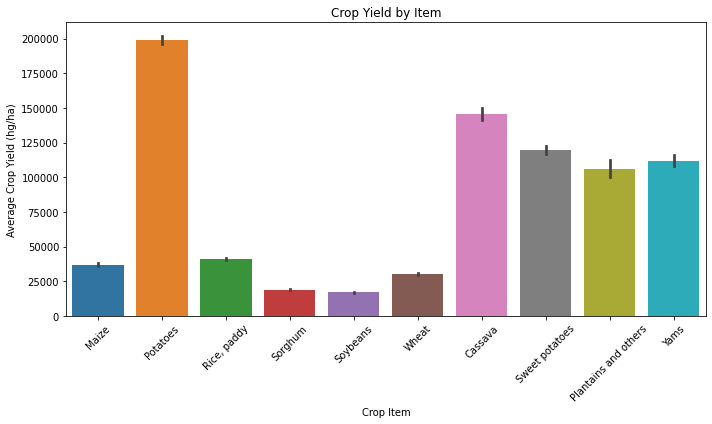

In [14]:
# Visualization 1: Bar Plot - Crop Yield by Item
plt.figure(figsize=(10, 6))
sns.barplot(x='Item', y='hg/ha_yield', data=df_visualization)
plt.xticks(rotation=45)
plt.title('Crop Yield by Item')
plt.xlabel('Crop Item')
plt.ylabel('Average Crop Yield (hg/ha)')
plt.tight_layout()
plt.show()

### Crop Yield over Years

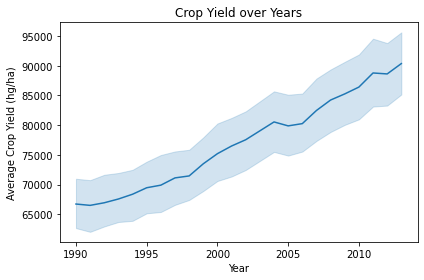

In [15]:
### Top 4 Genre Distributionplt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='hg/ha_yield', data=df_visualization)
plt.title('Crop Yield over Years')
plt.xlabel('Year')
plt.ylabel('Average Crop Yield (hg/ha)')
plt.tight_layout()
plt.show()

### Rainfall vs. Crop Yield

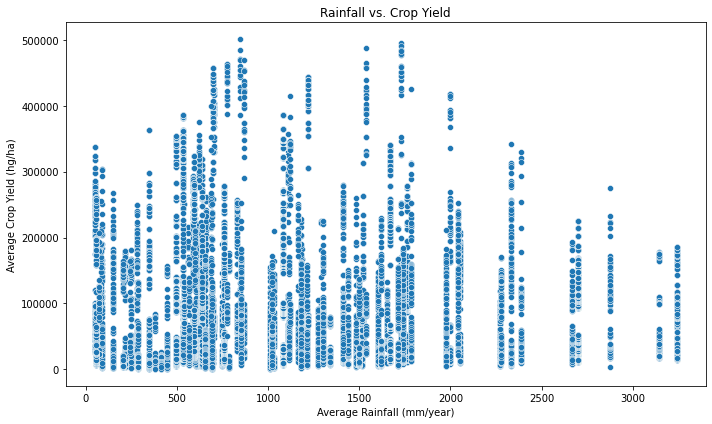

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=df_visualization)
plt.title('Rainfall vs. Crop Yield')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Average Crop Yield (hg/ha)')
plt.tight_layout()
plt.show()

### Pesticides vs. Crop Yield

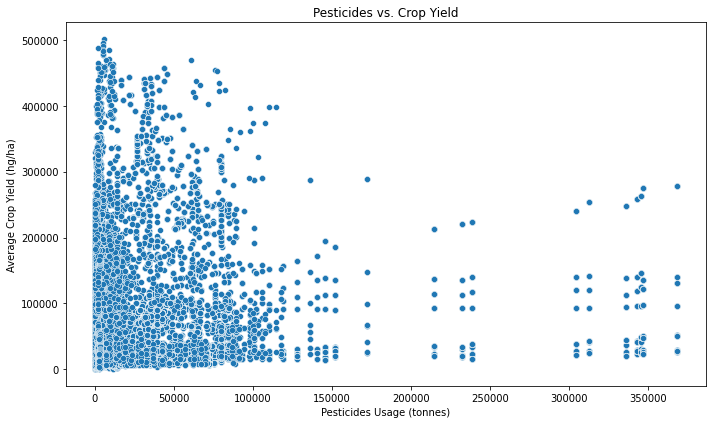

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=df_visualization)
plt.title('Pesticides vs. Crop Yield')
plt.xlabel('Pesticides Usage (tonnes)')
plt.ylabel('Average Crop Yield (hg/ha)')
plt.tight_layout()
plt.show()

### Temperature vs. Crop Yield

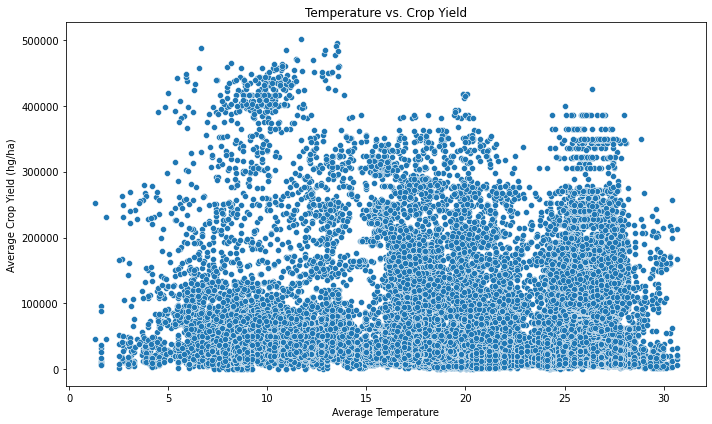

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=df_visualization)
plt.title('Temperature vs. Crop Yield')
plt.xlabel('Average Temperature')
plt.ylabel('Average Crop Yield (hg/ha)')
plt.tight_layout()
plt.show()

### Correlation Matrix Heatmap

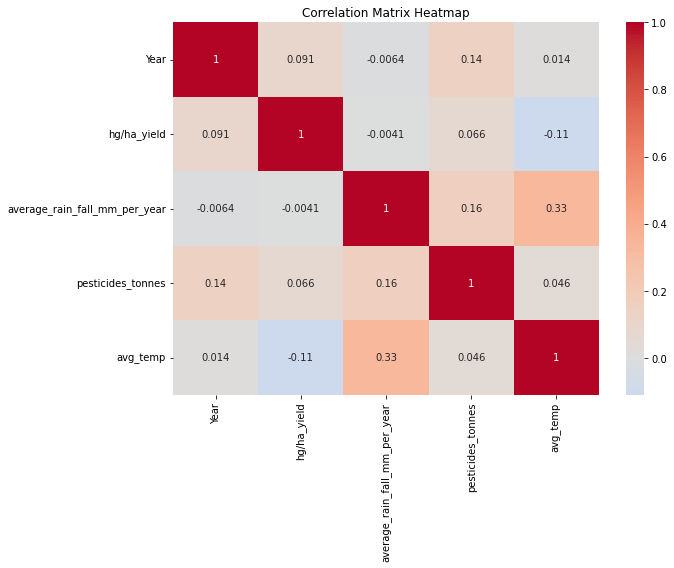

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_visualization.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

### Crop Yield Distribution by Year

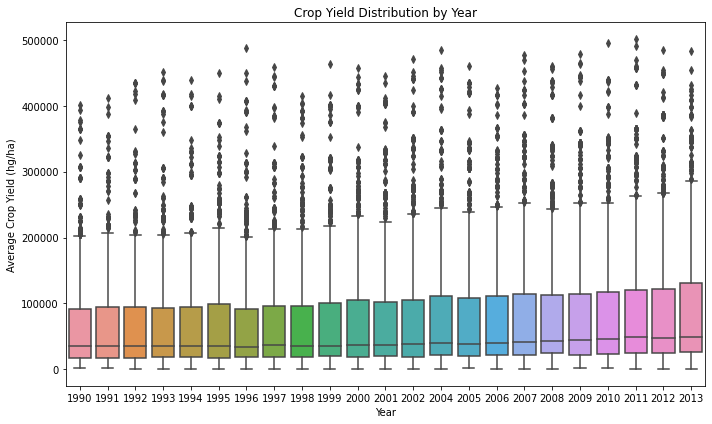

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='hg/ha_yield', data=df_visualization)
plt.title('Crop Yield Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Average Crop Yield (hg/ha)')
plt.tight_layout()
plt.show()

### Pair Plot of Numeric Variables

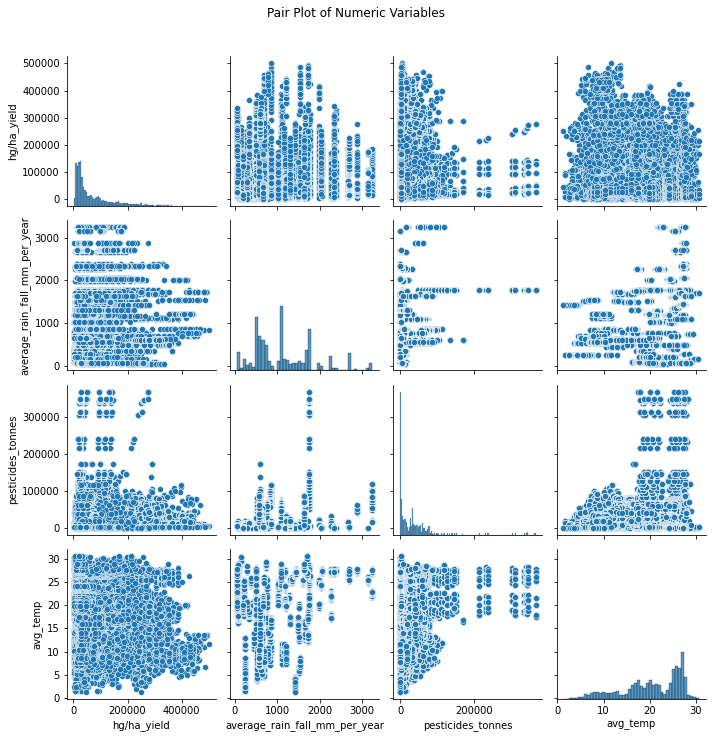

In [21]:
sns.pairplot(df_visualization, vars=['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()

### Top 5 Areas and Others

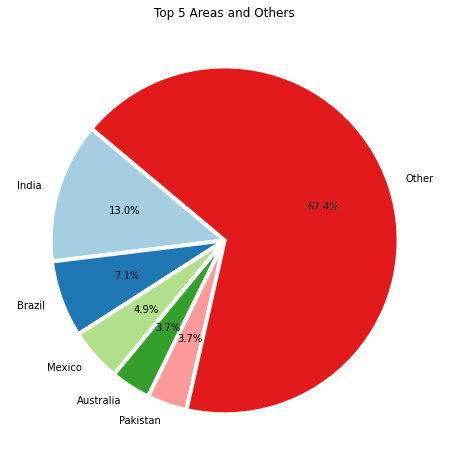

In [22]:
area_list = []
for areas in df_visualization['Area']:
    area_list.append(areas)
areas_counts = pd.Series(area_list).value_counts()
top_areas = areas_counts.head(5)
other_areas_count = areas_counts[5:].sum()
top_areas['Other'] = other_areas_count
plt.figure(figsize=(8, 8))
top_areas.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors,wedgeprops={'linewidth':4.0,'edgecolor':'white'})
plt.title('Top 5 Areas and Others')
plt.ylabel('')
plt.show()

### Correlation with Target Variable

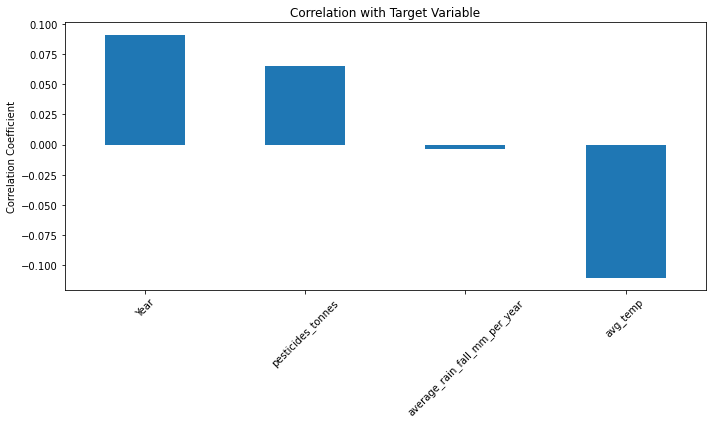

In [23]:
correlation_matrix = df_visualization.corr()
target_correlation = correlation_matrix['hg/ha_yield'].drop('hg/ha_yield')
target_correlation = target_correlation.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
target_correlation.plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Preprocessing
### One-Hot Encoding/Label Encoding for Categorical Data
The apply_one_hot_encoding function is applied to the DataFrame for various categorical columns ('area','year','item').

In [24]:
df_visualization = pd.get_dummies(df_visualization, columns=['Area'], prefix=['area'])

In [25]:
label_encoder = LabelEncoder()
df_visualization['Year'] = label_encoder.fit_transform(df_visualization['Year'])

In [26]:
df_visualization['ID'] = range(1, len(df_visualization) + 1)
df_visualization['Item'] = df_visualization['Item'].apply(lambda x: x.split(','))
df_long = df_visualization.explode('Item')
df_visualization = pd.concat([df_visualization, pd.get_dummies(df_long['Item'],prefix='Item', prefix_sep='_')], axis=1)
df_visualization = df_visualization.groupby('ID').max().reset_index()
df_visualization = df_visualization.drop('Item', axis=1)
df_visualization = df_visualization.drop('ID', axis=1)

### Feature Scaling for Model Enhancement
Min-Max scaling to normalize selected columns (hg/ha_yield, average_rain_fall_mm_per_year, pesticides_tonnes, and avg_temp) within the DataFrame.

In [27]:
columns_to_scale = ['hg/ha_yield', 'average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']
scaler = MinMaxScaler()
df_visualization[columns_to_scale] = scaler.fit_transform(df_visualization[columns_to_scale])

## Model Preparing
### Feature-Target Split 

In [28]:
y =  df_visualization['hg/ha_yield']
X = df_visualization.drop(['hg/ha_yield'], axis=1)

###  Train-Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Testing
### Support Vector Regression (SVR) Model Evaluation
A Support Vector Regression (SVR) model is trained on the provided training dataset (X_train, y_train) and evaluated for predictive performance using Mean Squared Error (MSE) and R-squared (R2) metrics for both the training and testing datasets, with the results visualized through bar plots.

In [30]:
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(X_train, y_train.ravel())
svr_y_pred = svr_regressor.predict(X_train)
svr_mse_train = mean_squared_error(y_train, svr_y_pred)
svr_r2_train = r2_score(y_train, svr_y_pred)
print(f"SVR Train Mean Squared Error: {svr_mse_train}")
print(f"SVR Train R-squared: {svr_r2_train}")
svr_y_pred = svr_regressor.predict(X_test)
svr_mse_test = mean_squared_error(y_test, svr_y_pred)
svr_r2_test = r2_score(y_test, svr_y_pred)
print(f"SVR Test Mean Squared Error: {svr_mse_test}")
print(f"SVR Test R-squared: {svr_r2_test}")

SVR Train Mean Squared Error: 0.007942977428392693
SVR Train R-squared: 0.7205071080097751
SVR Test Mean Squared Error: 0.008100344142449489
SVR Test R-squared: 0.7190722488584731


SVM  Testing MSE: 0.008100344142449489
SVM Training MSE: 0.007942977428392693


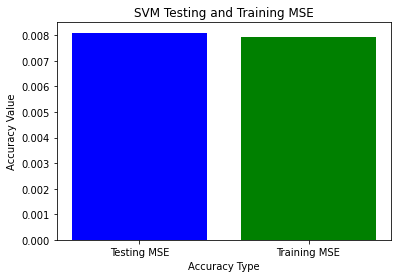

In [31]:
print(f"SVM  Testing MSE: {svr_mse_test}")
print(f"SVM Training MSE: {svr_mse_train}")
categories = ['Testing MSE', 'Training MSE']
values = [svr_mse_test, svr_mse_train]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('SVM Testing and Training MSE')
plt.show()

SVM  Testing R2: 0.7190722488584731
SVM Training R2: 0.7205071080097751


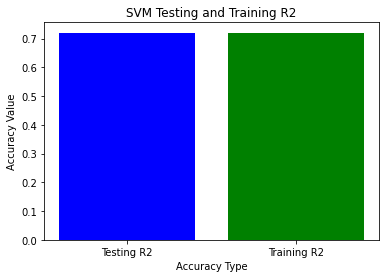

In [32]:
print(f"SVM  Testing R2: {svr_r2_test}")
print(f"SVM Training R2: {svr_r2_train}")
categories = ['Testing R2', 'Training R2']
values = [svr_r2_test, svr_r2_train]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('SVM Testing and Training R2')
plt.show()

### Random Forest Regression Model Evaluation
A Random Forest Regression model is trained with a maximum depth constraint of 5 on the provided training dataset (X_train, y_train). The model's predictive accuracy is assessed using Mean Squared Error (MSE) and R-squared (R2) metrics for both the training and testing datasets, with the results reported for evaluation.

In [33]:
rf_regressor = RandomForestRegressor(max_depth=5)
rf_regressor.fit(X_train, y_train.ravel())
rf_y_pred = rf_regressor.predict(X_train)
rf_mse_train = mean_squared_error(y_train, rf_y_pred)
rf_r2_train = r2_score(y_train, rf_y_pred)
print(f"Random Train Forest Mean Squared Error: {rf_mse_train}")
print(f"Random Train Forest R-squared: {rf_r2_train}")
rf_y_pred = rf_regressor.predict(X_test)
rf_mse_test = mean_squared_error(y_test, rf_y_pred)
rf_r2_test = r2_score(y_test, rf_y_pred)
print(f"Random Test Forest Mean Squared Error: {rf_mse_test}")
print(f"Random Test Forest R-squared: {rf_r2_test}")

Random Train Forest Mean Squared Error: 0.005275584628479774
Random Train Forest R-squared: 0.8143657818436784
Random Test Forest Mean Squared Error: 0.005738679551194609
Random Test Forest R-squared: 0.8009770557289602


RF  Testing MSE: 0.005738679551194609
RF Training MSE: 0.005275584628479774


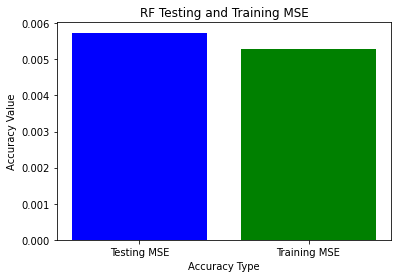

In [34]:
print(f"RF  Testing MSE: {rf_mse_test}")
print(f"RF Training MSE: {rf_mse_train}")
categories = ['Testing MSE', 'Training MSE']
values = [rf_mse_test, rf_mse_train]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('RF Testing and Training MSE')
plt.show()

RF  Testing R2: 0.8009770557289602
RF Training R2: 0.8143657818436784


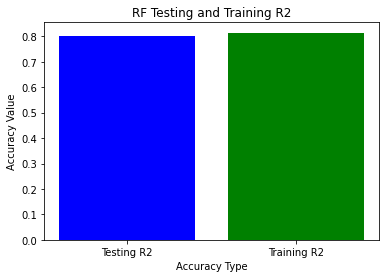

In [35]:
print(f"RF  Testing R2: {rf_r2_test}")
print(f"RF Training R2: {rf_r2_train}")
categories = ['Testing R2', 'Training R2']
values = [rf_r2_test, rf_r2_train]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('RF Testing and Training R2')
plt.show()

### Neural Network Regression Model Evaluation
Neural Network Regression model with specific architecture (64, 32, 16 hidden layers) and training parameters (max_iter=1000, alpha=1) is trained on the provided training dataset (X_train, y_train). The code then evaluates the model's predictive performance using Mean Squared Error (MSE) and R-squared (R2) metrics for both the training and testing datasets. 

In [36]:
nn_regressor = MLPRegressor(hidden_layer_sizes=(64,32,16,), max_iter=1000,alpha=1)
nn_regressor.fit(X_train, y_train.ravel())
nn_y_pred = nn_regressor.predict(X_train)
nn_mse_train = mean_squared_error(y_train, nn_y_pred)
nn_r2_train = r2_score(y_train, nn_y_pred)
print(f"Neural Train Network Mean Squared Error: {nn_mse_train}")
print(f"Neural Train Network R-squared: {nn_r2_train}")
nn_y_pred = nn_regressor.predict(X_test)
nn_mse_test = mean_squared_error(y_test, nn_y_pred)
nn_r2_test = r2_score(y_test, nn_y_pred)
print(f"Neural Test Network Mean Squared Error: {nn_mse_test}")
print(f"Neural Test Network R-squared: {nn_r2_test}")

Neural Train Network Mean Squared Error: 0.009417022905437038
Neural Train Network R-squared: 0.6686392490087454
Neural Test Network Mean Squared Error: 0.009536590633334929
Neural Test Network R-squared: 0.6692618346743484


NN  Testing MSE: 0.009536590633334929
NN Training MSE: 0.009417022905437038


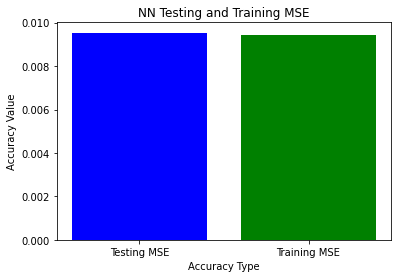

In [37]:
print(f"NN  Testing MSE: {nn_mse_test}")
print(f"NN Training MSE: {nn_mse_train}")
categories = ['Testing MSE', 'Training MSE']
values = [nn_mse_test, nn_mse_train]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('NN Testing and Training MSE')
plt.show()

NN  Testing R2: 0.6692618346743484
NN Training R2: 0.6686392490087454


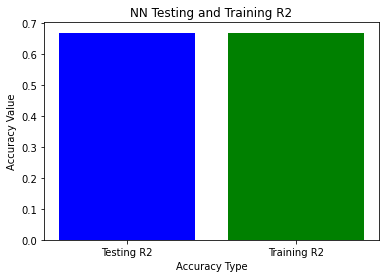

In [38]:
print(f"NN  Testing R2: {nn_r2_test}")
print(f"NN Training R2: {nn_r2_train}")
categories = ['Testing R2', 'Training R2']
values = [nn_r2_test, nn_r2_train]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('NN Testing and Training R2')
plt.show()

### K-Nearest Neighbors (KNN) Regression Model Evaluation
K-Nearest Neighbors (KNN) Regression model is trained on the provided training dataset (X_train, y_train), and its predictive performance is assessed. The code calculates and displays Mean Squared Error (MSE) and R-squared (R2) metrics for both the training and testing datasets, providing insights into the model's accuracy and generalization capability.

In [39]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train.ravel())
knn_y_pred_train = knn_regressor.predict(X_train)
knn_mse_train = mean_squared_error(y_train, knn_y_pred_train)
knn_r2_train = r2_score(y_train, knn_y_pred_train)
print(f"KNN Train Mean Squared Error: {knn_mse_train}")
print(f"KNN Train R-squared: {knn_r2_train}")
knn_y_pred_test = knn_regressor.predict(X_test)
knn_mse_test = mean_squared_error(y_test, knn_y_pred_test)
knn_r2_test = r2_score(y_test, knn_y_pred_test)
print(f"KNN Test Mean Squared Error: {knn_mse_test}")
print(f"KNN Test R-squared: {knn_r2_test}")

KNN Train Mean Squared Error: 0.0025327188913251523
KNN Train R-squared: 0.9108801537060409
KNN Test Mean Squared Error: 0.004816062308145975
KNN Test R-squared: 0.8329743119808002


KNN  Testing MSE: 0.004816062308145975
KNN Training MSE: 0.0025327188913251523


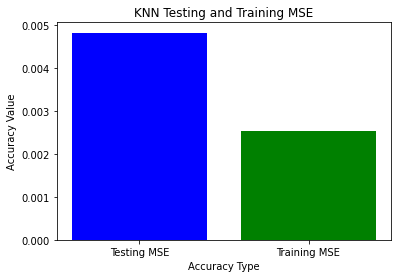

In [40]:
print(f"KNN  Testing MSE: {knn_mse_test}")
print(f"KNN Training MSE: {knn_mse_train}")
categories = ['Testing MSE', 'Training MSE']
values = [knn_mse_test, knn_mse_train]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('KNN Testing and Training MSE')
plt.show()

KNN  Testing R2: 0.8329743119808002
KNN Training R2: 0.9108801537060409


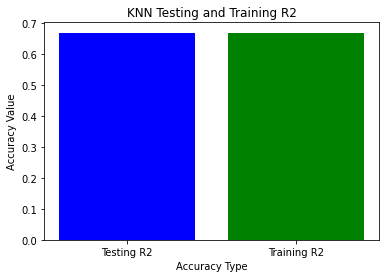

In [41]:
print(f"KNN  Testing R2: {knn_r2_test}")
print(f"KNN Training R2: {knn_r2_train}")
categories = ['Testing R2', 'Training R2']
values = [nn_r2_test, nn_r2_train]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('KNN Testing and Training R2')
plt.show()

## Predicted vs Actual Labels
### Support Vector Regression (SVR)

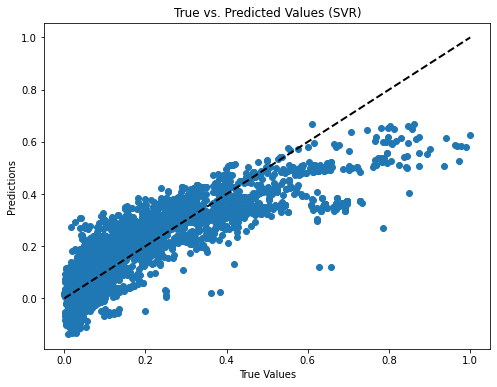

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values (SVR)')
plt.show()

### Random Forest Regressor

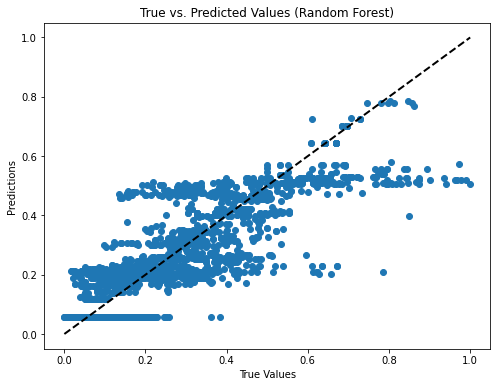

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values (Random Forest)')
plt.show()

### Neural Network Regressor

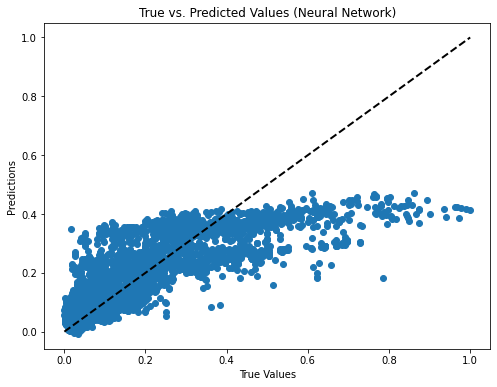

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, nn_y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values (Neural Network)')
plt.show()

### K-Nearest Neighbours Regressor

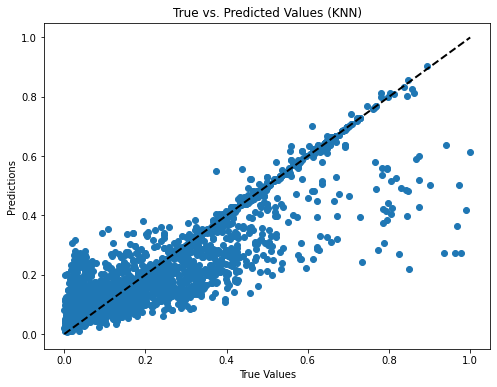

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values (KNN)')
plt.show()